In [1]:
!pip install fastai --upgrade -q
!pip install google
!pip install kornia


     |████████████████████████████████| 225 kB 1.9 MB/s eta 0:00:01


In [1]:
from fastai.vision.all import *
from kornia import rgb_to_grayscale

In [2]:
#!unzip data/top20.zip -d data/top20

In [3]:
chart_class = ['CDLENGULFING_BULL', 'CDLENGULFING_BEAR', 'CDLSHORTLINE_BULL', 'CDLSHORTLINE_BEAR', 'CDLHIKKAKE_BULL', 'CDLHARAMI_BULL', 'CDLBELTHOLD_BULL', 'CDLHIKKAKE_BEAR', 'CDLHARAMI_BEAR', 'CDLBELTHOLD_BEAR', 'CDLLONGLINE_BULL', 'CDLLONGLINE_BEAR', 'CDLCLOSINGMARUBOZU_BULL', 'CDLHIGHWAVE_BEAR', 'CDLCLOSINGMARUBOZU_BEAR', 'CDLDOJI_BULL', 'CDLRICKSHAWMAN_BULL', 'CDLSPINNINGTOP_BULL', 'CDLHIGHWAVE_BULL', 'CDLSPINNINGTOP_BEAR', 'CDLLONGLEGGEDDOJI_BULL']
print("numer of class : {0}".format(len(chart_class)))
root_dir = 'data'
#base_dir = root_dir + '/top20'
#base_dir = root_dir + '/top10'
base_dir = root_dir + '/2018-3year-5days-nasdaqtop300-new-reduced'
path = Path(base_dir)
print(path)

numer of class : 21
data/2018-3year-5days-nasdaqtop300-new-reduced


In [6]:
class RGB2GreyTransform(DisplayedTransform):
    order = 15 # run after IntToFloatTransform
    def encodes(self, o:TensorImage):
        c = o.shape[1]
        return rgb_to_grayscale(o).expand(-1,c,-1,-1)
    
charts = DataBlock(blocks=(ImageBlock, CategoryBlock),
   get_items=get_image_files,
   get_y=parent_label,
   splitter=RandomSplitter(valid_pct=0.2, seed=42),
   #item_tfms=Resize(400),
# 288*201
   batch_tfms = [IntToFloatTensor(), RGB2GreyTransform()])
    #item_tfms=RandomResizedCrop(224, min_scale=0.5)
   #batch_tfms=aug_transforms()

In [7]:
dls = charts.dataloaders(path)

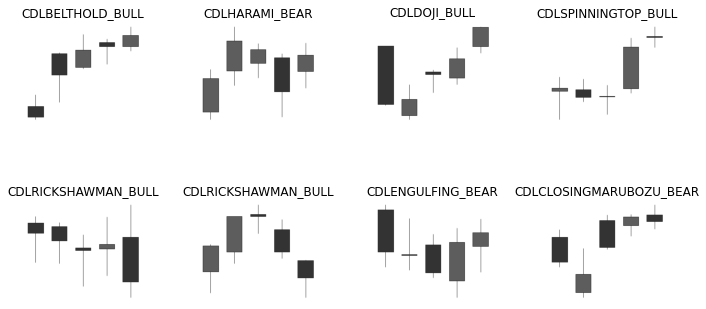

In [8]:
dls.train.show_batch(max_n=8, nrows=2)

In [ ]:
torch.cuda.empty_cache()
learn = cnn_learner(dls, resnet34, loss_func=CrossEntropyLossFlat(), metrics=accuracy)
learn.model = torch.nn.DataParallel(learn.model, device_ids=[0,1,2,3,4,5,6,7])
#learn.model.to(f'cuda:{learn.model.device_ids[0]}')

#서버 multiple gpu 8대
learn.fine_tune(15)
#사용할수 있는 learner, epoch숫자는 어떻게 변하는가?
#mnasnet이랑 resnet152, densenet161, 돌려보기
#metrics== accuracy로 돌려볼것


# import torch

# torch.cuda.empty_cache()
# learn = cnn_learner(dls, resnet50, metrics=error_rate)
# #learn.model = torch.nn.DataParallel(learn.model, device_ids=[0, 1,2,3,4,5,6,7])
# #lr_min, lr_steep = learn.lr_find()
# learn.fine_tune(15)

epoch,train_loss,valid_loss,accuracy,time
0,2.154615,1.842564,0.325762,05:17


epoch,train_loss,valid_loss,accuracy,time
0,1.566577,1.399601,0.465286,07:39
1,1.471846,1.332659,0.482857,07:38
2,1.445958,1.315233,0.473095,07:43
3,1.383509,1.281193,0.482667,07:43
4,1.354628,1.262655,0.490667,07:45
5,1.285627,1.259483,0.488286,07:41
6,1.272244,1.250204,0.484524,07:39
7,1.250558,1.228802,0.503667,07:42
8,1.171731,1.226687,0.493000,07:43
9,1.128652,1.248985,0.489476,07:43


In [ ]:
#dls.vocab

In [10]:
interp = ClassificationInterpretation.from_learner(learn)
interp.print_classification_report()

                         precision    recall  f1-score   support

       CDL3OUTSIDE_BEAR       0.69      0.93      0.79       985
       CDL3OUTSIDE_BULL       0.69      0.93      0.79       996
       CDLBELTHOLD_BEAR       0.66      0.38      0.48       987
       CDLBELTHOLD_BULL       0.67      0.39      0.50       998
CDLCLOSINGMARUBOZU_BEAR       0.64      0.41      0.50      1033
CDLCLOSINGMARUBOZU_BULL       0.59      0.32      0.41       994
           CDLDOJI_BULL       0.20      0.02      0.04       990
      CDLENGULFING_BEAR       0.64      0.77      0.70       968
      CDLENGULFING_BULL       0.65      0.85      0.74       974
         CDLHAMMER_BULL       0.70      0.79      0.74       989
     CDLHANGINGMAN_BEAR       0.74      0.85      0.79      1023
         CDLHARAMI_BEAR       0.56      0.91      0.69      1023
         CDLHARAMI_BULL       0.51      0.75      0.61       989
       CDLHIGHWAVE_BEAR       0.35      0.53      0.42       998
       CDLHIGHWAVE_BULL 

In [1]:
pkl_name = "2016-5year-5days-nasdaqtop300-reduced-wb-5000.pkl"
learn.model = learn.model.module
learn.export(pkl_name)
path = Path()
path.ls(file_exts=pkl_name)

NameError: name 'learn' is not defined